<big>**基本介绍**</big>

感知机是一种线性二分类，标签为+1和-1，它的目标是要将输入实例通过分离超平面将正负二类分离，是神经网络和支持向量机的基础。
感知机的分类函数是 $f(x)=sign(wx+b)$.

感知机算法的损失函数设为误分类点到超平面的总距离，即$\displaystyle \sum_{x_i \in M} \frac{|wx_i+b|}{||w||}$。


而误分类点分成两类，$y_i>0$时，$wx_i+b<0$; $y_i<0$时，$wx_i+b>0$。

因而,$-y_i*(wx_i+b)>0$，所以，这两种情况到超平面的距离可以表示为：

$L=\displaystyle \sum_{x_i \in M} \frac{-y_i(wx_i+b)}{||w||}$.

而$||w||$也不是很重要，毕竟只是一个常数值，可以去掉。最终，损失函数就可以表示为：


$L=\displaystyle \sum_{x_i \in M} {-y_i(wx_i+b)}$



P.S.
平面上一点$(x_0, y_0)$到直线$Ax+By+C=0$的距离为$\frac{|Ax_0+By_0+c|}{\sqrt{A^2+B^2}}$

--------------------------

<big>**梯度下降算法训练感知机算法**</big>



<big>**</big>

In [2]:
# 使用感知机算法对iris数据进行分类
#coding=utf-8

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

df['label'] = iris.target
df.head

<bound method NDFrame.head of      sepal length  sepal width  petal length  petal width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]>

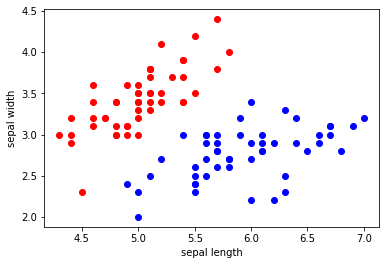

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], c='red', label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], c='blue', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [6]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X,y = data[:, :-1], data[:, -1]
y = np.array([1 if i==1 else -1 for i in y])
X[:2], y[:2]

(array([[5.1, 3.5],
        [4.9, 3. ]]),
 array([-1, -1]))

In [23]:
class Perceptron():
    def __init__(self):
        self.w = np.ones(len(X[0]), dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
    
    def sign(self, w, b, x):
        y = np.dot(w, x) + b
        
        return y
    
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_cnt = 0
            for i in range(len(X_train)):
                X, y = X_train[i], y_train[i]
                if y * self.sign(self.w, self.b, X) <= 0.:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_cnt += 1
            if wrong_cnt == 0:
                is_wrong = True
        
        return 'train done!'

In [24]:
# 开始调用感知机模型
perceptron = Perceptron()
perceptron.fit(X, y)


'train done!'

In [25]:
perceptron.w, perceptron.b

(array([  7.8, -10. ]), -12.099999999999973)

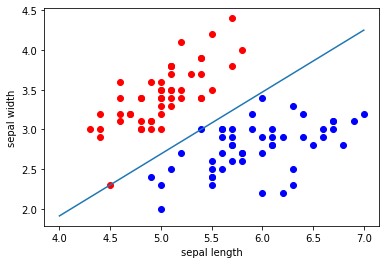

In [20]:
# 可视化超平面
x_points = np.linspace(4, 7, 10)
# 误分类点到超平面的距离
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], c='red', label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], c='blue', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()